### Numpy basics

In [1]:
import numpy as np

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [2]:
m = np.arange(12).reshape((3,4))
print('mean of elements of each row:', np.mean(m,1))         #calculated among columns
print('mean of elements of each columns:', np.mean(m,0))     #calculated among rows
print('overall mean:', np.mean(m))


mean of elements of each row: [1.5 5.5 9.5]
mean of elements of each columns: [4. 5. 6. 7.]
overall mean: 5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [3]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

print('first method:')
print(np.outer(u,v))

t = np.array( [a*b for a in u for b in v] ).reshape(4,4)
print('\nsecond method:')
print(t)

z = np.tile(u,(4,1)).T * np.tile(v,(4,1))
print('\nthird method:')
print(z)


first method:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

second method:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

third method:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [4]:
import numpy.random as npr

npr.seed(2024286)

M = npr.rand(10,6)                  #generating matrix
tester = (M<0.1)                    #matrix of boolean values (element < 0.1)
check = np.any(tester,1)            #list of boolean values (Q:row includes element < 0.1 ?)
for i in range(len(tester)):        #Annihilation of wrong rows
    if check[i] == True: M[i,:] = 0
print(M)


[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.83851613 0.84248362 0.92983859 0.60178463 0.38375602 0.85836661]
 [0.41900621 0.28683326 0.76139754 0.69064586 0.98255146 0.62308785]
 [0.32208133 0.8855047  0.43795798 0.74230254 0.89392506 0.19092076]
 [0.         0.         0.         0.         0.         0.        ]
 [0.93677844 0.35545035 0.34648682 0.58691228 0.7516655  0.89686216]
 [0.84584227 0.80158675 0.60050403 0.84326763 0.95250141 0.37550169]
 [0.95088905 0.40873345 0.32177255 0.69661305 0.48000257 0.83113277]
 [0.         0.         0.         0.         0.         0.        ]]


4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

[]
[3.96236911 3.89947436 0.81763172 0.75473697]


Text(0, 0.5, '|sin(a)-cos(a)|')

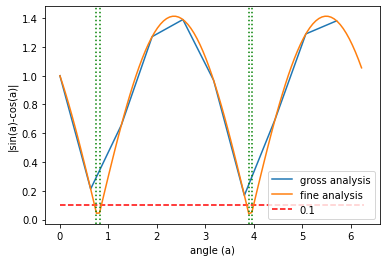

In [98]:
from math import pi
import matplotlib.pyplot as plt
%matplotlib inline 

a = np.linspace(0,2*pi,100)
a = a[::10]                                   #extract tenth elements
a = a[::-1]                                   #invert array
plt.hlines(0.1,0,2*pi,colors='red', linestyles='dashed', label='0.1')     #Illustrate threshold
plt.plot(a,np.absolute(np.sin(a)-np.cos(a)),label='gross analysis');
A = a[np.absolute(np.sin(a)-np.cos(a)) < 0.1]
print( A )     #Notice: no elements are found matching the request. I try with a finer linspace:

b = np.linspace(0,2*pi,1000)
b = b[::10]
b = b[::-1]
plt.plot(b,np.absolute(np.sin(b)-np.cos(b)),label='fine analysis');
B = b[np.absolute(np.sin(b)-np.cos(b)) < 0.1]
print( B )     #OK: some points matching requirements are found
for x in B:
    plt.axvline(x, c = 'green', ls = ':')
plt.legend()
    
    
plt.xlabel('angle (a)')
plt.ylabel('|sin(a)-cos(a)|')

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [6]:
a = np.tile(np.arange(1,11),(10,1))
t = a*a.T                             #definition of moltiplication table
print(t)
print('Trace:',np.trace(t))
print('Diagonal (offset = 1):', np.diag(t,1))
for i in range(10):
    t[i] = t[i][::-1]                          #invert order of each row 
print('Antidiagonal:', np.diag(t))


[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
Trace: 385
Diagonal (offset = 1): [ 2  6 12 20 30 42 56 72 90]
Antidiagonal: [10 18 24 28 30 30 28 24 18 10]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [7]:
Route = ['Chicago', 'Springfield', 'Saint-Louis', 'Tulsa', 'Oklahoma City', 'Amarillo', 'Santa Fe', 'Albuquerque', 'Flagstaff', 'Los Angeles']
Distances = [0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448]
dic = {}
for i in range(len(Route)):
    dic[Route[i]] = Distances[i]  #Fill dictionary with data
print('Route 66 steps:', dic)

miles = np.array(Distances)   

a = np.tile(miles, (len(miles),1))      #use of broadcasting

tab = np.absolute(a - a.T)    #find difference between cells

print('\n',Route)
print(tab)

print('distances in km:')
print(tab*1.61)









    

Route 66 steps: {'Chicago': 0, 'Springfield': 198, 'Saint-Louis': 303, 'Tulsa': 736, 'Oklahoma City': 871, 'Amarillo': 1175, 'Santa Fe': 1475, 'Albuquerque': 1544, 'Flagstaff': 1913, 'Los Angeles': 2448}

 ['Chicago', 'Springfield', 'Saint-Louis', 'Tulsa', 'Oklahoma City', 'Amarillo', 'Santa Fe', 'Albuquerque', 'Flagstaff', 'Los Angeles']
[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]
distances in km:
[[   0.    318.78  487.83 1184.96 1402.31 1891.75 2374.75 2485.84 3079.93
  3941.28]
 [ 318.78    0.    169.05 

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [8]:
def mask(n, lenght=100):
    l = [False, False]
    for i in range(2,lenght):
        a = i%n == 0
        b = i != n
        l.append(a^b)
    x = np.array(l)        #Answers to: the number can NOT be divided by n (prime if true for all n)
    return x



N = 100
#N = int(input('insert max N:'))
a = np.arange(N)
msk = np.array([True for i in range(N)])
for n in range(2, int(np.sqrt(N))+1): msk &= mask(n,N)        #overlapping of masks: only the values returning true to
print(a[msk])                                                 #the previous question are kept

    



[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

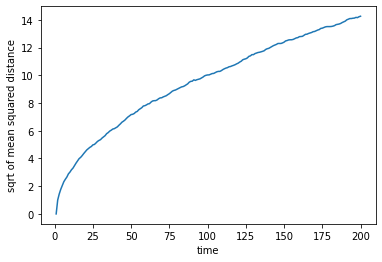


The result was not at first what i did expect (to the maximum of my sincerity, I was not expecting anything at all, but I was curious). Anyway, I looked up for some explanation in the internet and the results seems to match the prediction (root squared trend confirmed.


In [91]:
x = pow(-1, npr.randint(0,2,size=(1000,200)))       #creates an array of (-1)^rnd values, with rnd = 0,1 (50% prob.)
y = np.empty((1000,200))
for i in range(np.size(x,0)):
    for j in range(np.size(x,1)):
        y[i,j] = np.sum(x[i,:j])                    #fills y array with cumulative distance
z = y*y
m = np.mean(z,0)                                    #creates unidimentional array with mean squared distance per time step
time = np.linspace(1,200,200)
plt.xlabel('time')
plt.ylabel('sqrt of mean squared distance')
plt.plot(time,np.sqrt(m))
plt.show()


print('The result was not at first what i did expect (to the maximum of my sincerity, I was not expecting anything at all, but I was curious). Anyway, I looked up for some explanation in the internet and the results seems to match the prediction (root squared trend confirmed).')
  
      
      
      
      

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

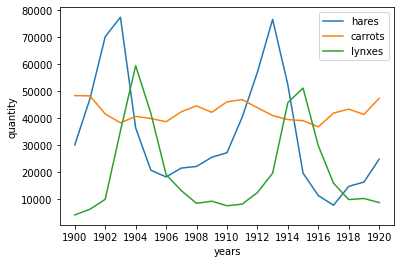

data: [hares,carrots,lynxes]
mean values: [34080.95238095238, 42400.0, 20166.666666666668]
stdev: [20897.906458089667, 3322.5062255844787, 16254.591536908763]

Correlations:
corr(hc):
 [[ 1.         -0.01660378]
 [-0.01660378  1.        ]]
corr(cl):
 [[ 1.         -0.68057717]
 [-0.68057717  1.        ]]
corr(lh):
 [[1.         0.07189206]
 [0.07189206 1.        ]]

Correlation matrixes show a consistent inverse correlation between the number of carrots and lynxes, while correlation between the two animals and between carrots and hares are almost null.
However, from the plot one may safely assert that there are similar trends in the number of lynxes and hares: so let us see what happens traslating the lynxes data 2 years back in time:


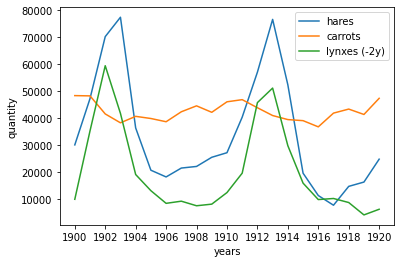

It is clear how the trends of lynxes and hares are superimposed: calculating the correlation between the two species with this time delay we find:

corr(lh):
 [[1.         0.92480044]
 [0.92480044 1.        ]]

This strong direct correlation, shifted in time, is an evident consequence of the fact that hares are the primar source of aliments for lynxes: the amount when the amount of hares raises, the number of predators can increase as well; this leads to an enormous consume of carrots (we have no evidence of this according to calculated correlations, but looks probable that under a certain time traslation hares and carrots will be anticorrelated). That will eventually cause hares to drop in number, leading to a consequential decrease of lynxes (noticeable in about two years of time).

Here a summary of the highest class per year:
1900 : carrots
1901 : carrots
1902 : hares
1903 : hares
1904 : lynxes
1905 : lynxes
1906 : carrots
1907 : carrots
1908 : carrots
1909 : carrots
1910 : carrots

In [87]:
# I couldn't figure out how to use wget to download the file (it kept on downloading an HTML), so i got it the old way (manual download)

a = np.loadtxt('populations.txt')   #import file

years = a[:,0]         #create arrays
hares = a[:,1]
lynxes = a[:,2]
carrots = a[:,3]
classes = [hares,carrots,lynxes]

plt.plot(years,hares,label='hares')                   #plot instructions
plt.plot(years,carrots,label='carrots')
plt.plot(years,lynxes,label='lynxes')
plt.legend()
plt.xticks(np.arange(years[0], years[-1]+1, 2.0))
plt.xlabel('years')
plt.ylabel('quantity')
plt.show()


#main statistics:
mean = [np.mean(c) for c in classes]
std = [np.std(c) for c in classes]
print('data: [hares,carrots,lynxes]')
print('mean values:',mean)
print('stdev:',std)

hc = np.corrcoef(hares,carrots)
cl = np.corrcoef(carrots,lynxes)
lh = np.corrcoef(lynxes,hares)
print('\nCorrelations:')
print('corr(hc):\n',hc)
print('corr(cl):\n',cl)
print('corr(lh):\n',lh)
      
print('\nCorrelation matrixes show a consistent inverse correlation between the number of carrots and lynxes, while correlation between the two animals and between carrots and hares are almost null.')
print('However, from the plot one may safely assert that there are similar trends in the number of lynxes and hares: so let us see what happens traslating the lynxes data 2 years back in time:')


#Some curious calculations about data

early_lyn = np.roll(lynxes,-2)

plt.plot(years,hares,label='hares')                   #plot instructions
plt.plot(years,carrots,label='carrots')
plt.plot(years,early_lyn,label='lynxes (-2y)')
plt.legend()
plt.xticks(np.arange(years[0], years[-1]+1, 2.0))
plt.xlabel('years')
plt.ylabel('quantity')
plt.show()

print('It is clear how the trends of lynxes and hares are superimposed: calculating the correlation between the two species with this time delay we find:')

lh = np.corrcoef(early_lyn[:18],hares[:18])
print('\ncorr(lh):\n',lh)

print('\nThis strong direct correlation, shifted in time, is an evident consequence of the fact that hares are the primar source of aliments for lynxes: the amount when the amount of hares raises, the number of predators can increase as well; this leads to an enormous consume of carrots (we have no evidence of this according to calculated correlations, but looks probable that under a certain time traslation hares and carrots will be anticorrelated). That will eventually cause hares to drop in number, leading to a consequential decrease of lynxes (noticeable in about two years of time).')



#Most per year:
print('\nHere a summary of the highest class per year:')
for i in range(len(a)): 
    if a[i].argmax() == 1: print(int(a[i,0]),':','hares')
    elif a[i].argmax() == 2: print(int(a[i,0]),':','lynxes')
    else: print(int(a[i,0]),':','carrots')